# Exploratory Data Analysis using Python - A Case Study
Analyzing agricultural-raw-material-prices dataset over the years 

This dataset consists of prices and price % change for coarse wool, copra, cotton, fine wool, hardlog, hard sawnwood, hide, plywood, rubber, softlog, soft sawnwood and wood pulp.

The following topics are covered in this notebook:

- Selecting and downloading a dataset
- Data preparation and cleaning
- Exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

In this tutorial, we'll analyze the agricultural-raw-material-prices dataset.

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the `opendatasets` helper library to download the files.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/kianwee/agricultural-raw-material-prices-19902020' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jayashreemallipudi
Your Kaggle Key: ········


100%|██████████| 22.8k/22.8k [00:00<00:00, 15.1MB/s]

The dataset has been downloaded and extracted.

In [4]:

data_dir = './agricultural-raw-material-prices-19902020'

In [7]:
import os
os.listdir(data_dir)

['agricultural_raw_material.csv']

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "agricultural-raw-material-prices-project" 

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jayashreemallipudi3/agricultural-raw-material-prices-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jayashreemallipudi3/agricultural-raw-material-prices-project


'https://jovian.ai/jayashreemallipudi3/agricultural-raw-material-prices-project'

## Data Preparation and Cleaning



In [9]:
# Import required packages
import numpy as np
import pandas as pd

###### Loading the dataset into a data frame using Pandas

In [10]:

df=pd.read_csv('./agricultural-raw-material-prices-19902020/agricultural_raw_material.csv')
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


###### Exploring the dataset

In [23]:
df.shape

(361, 25)

In [49]:
df.info

<bound method DataFrame.info of             Coarse wool Price  Coarse wool price % Change  Copra Price  \
Month                                                                    
1990-05-01             447.26                        7.27       234.00   
1990-06-01             440.99                        1.40       216.00   
1990-07-01             418.44                        5.11       205.00   
1990-08-01             418.44                        0.00       198.00   
1990-09-01             412.18                        1.50       196.00   
...                       ...                         ...          ...   
2017-02-01            1029.58                        0.18      1146.25   
2017-03-01            1059.60                        2.92      1016.00   
2017-04-01             991.12                        6.46      1044.00   
2017-05-01            1019.95                        2.91      1112.50   
2017-06-01            1065.81                        4.50      1119.00   

     

In [24]:
#Checking Null Values of each column
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

### Handle missing, incorrect and invalid data 


In [11]:
# Replacing %, "," and "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

# Dropping rows with NaN values
df = df.dropna()

# Check to see if all NaN values are resolved
df.isnull().sum()

# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")

df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


# DateTime columns
formatting the datetime column and setting it as index for the dataset

In [12]:
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)

# Indexing month
df = df.set_index('Month')

In [10]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [47]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jayashreemallipudi3/agricultural-raw-material-prices-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jayashreemallipudi3/agricultural-raw-material-prices-project


'https://jovian.ai/jayashreemallipudi3/agricultural-raw-material-prices-project'

## Exploratory Analysis and Visualization


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [42]:
    print("\n\n\nDatatype: \n")
    print(df.dtypes)
    print("\n\n\nData summary: \n")
    print(df.describe())




Datatype: 

Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64
dtype: object



Data sum

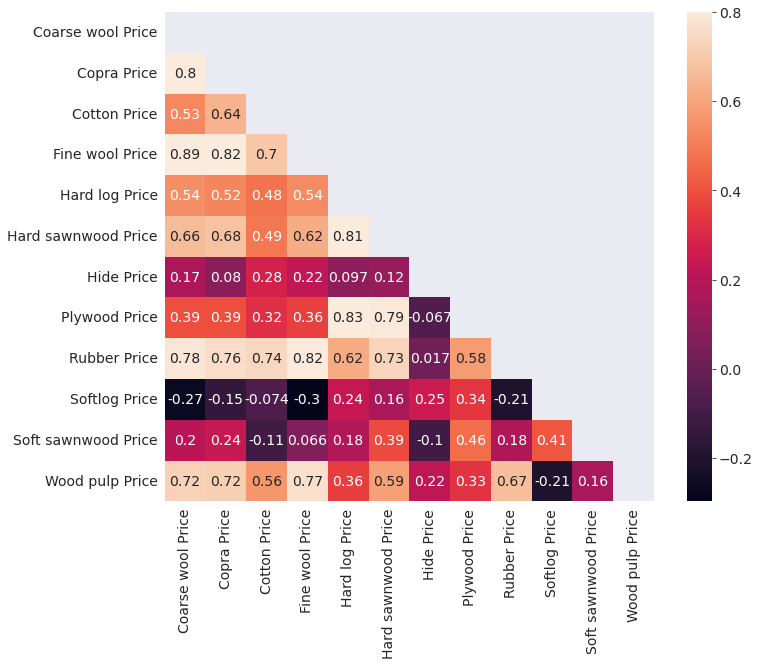

In [14]:
#raw-materials list
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#getting the correlation matrix
corrmat = df[raw_data].corr()
#setting the size of plot
fig = plt.figure(figsize = (12, 9))
#masking the upper traingle part since matrix is symmetric(repetitive) 
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

The Heatmap depicts correlation between the raw-materials
higher the correlated value higher chance of being two raw-materials related but not necessarily

Explore one or more columns by plotting a graph below, and add some explanation about it
**Correlation matrix**

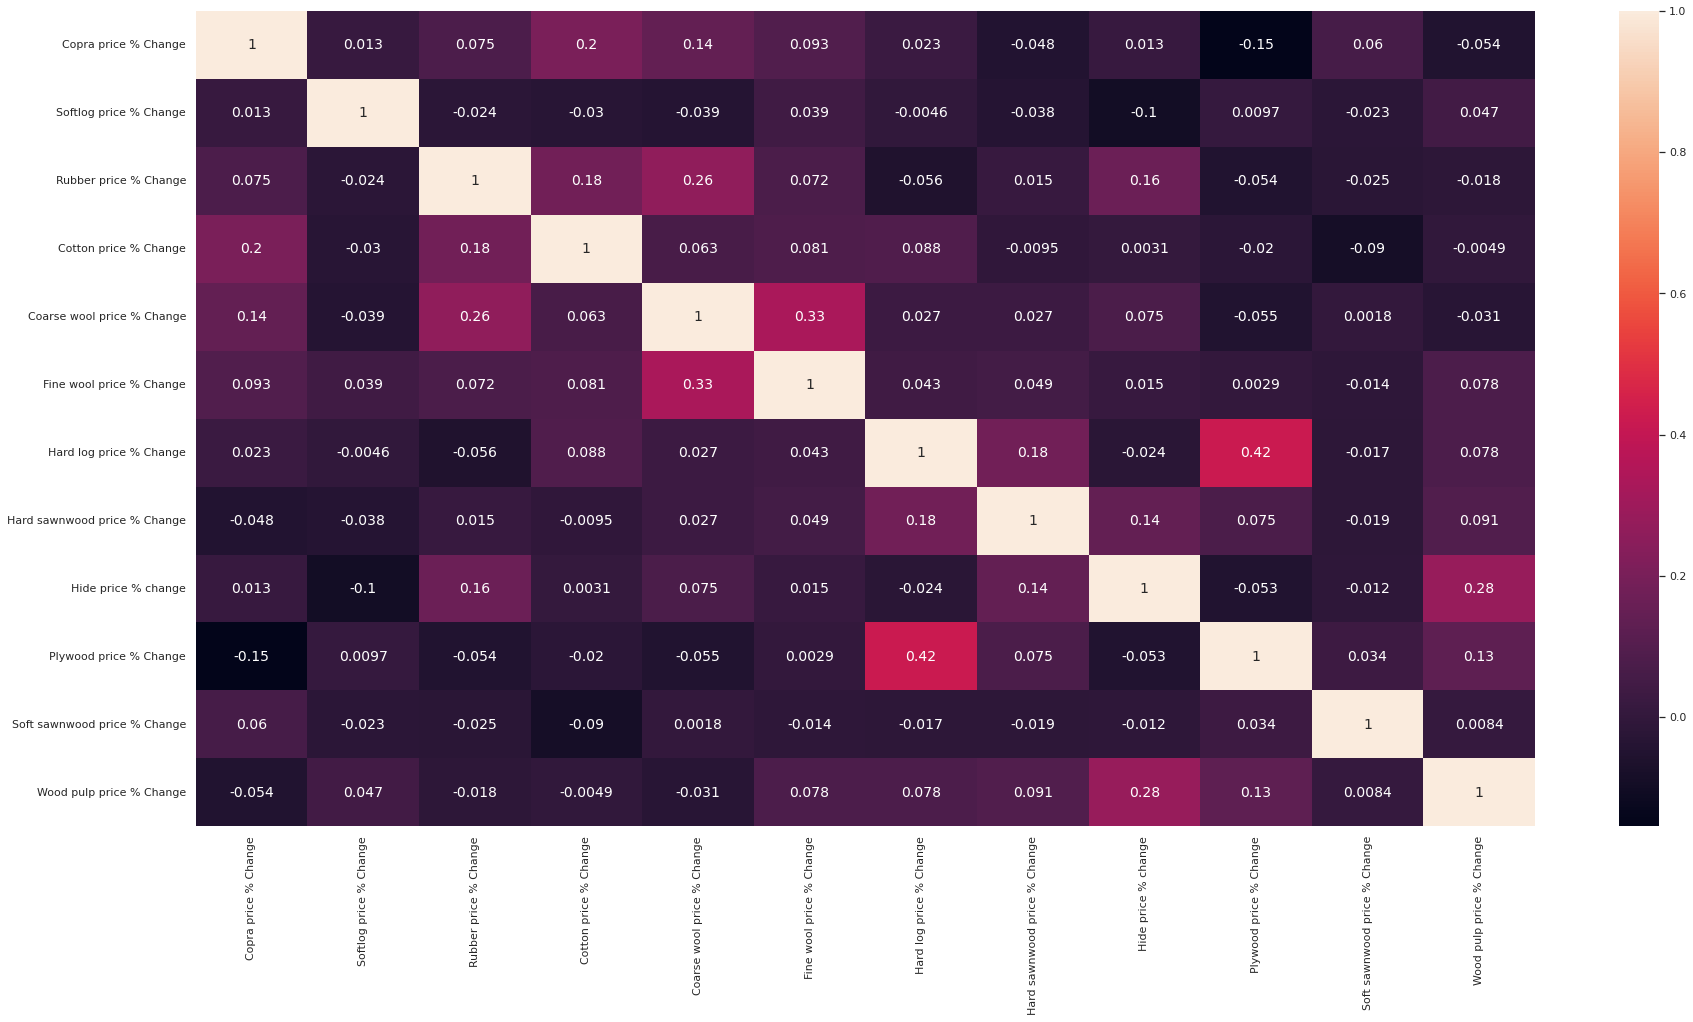

In [26]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

From this plot we can say that there is almost no relation between % change of raw-material prices

1. the negative value implies two variables are negatively correlated (one increase,other decrease)
2. Zero implies no relation
3. other wise higher the value higher the chance of relation.

## prices and their % change plots
### Coarse wool

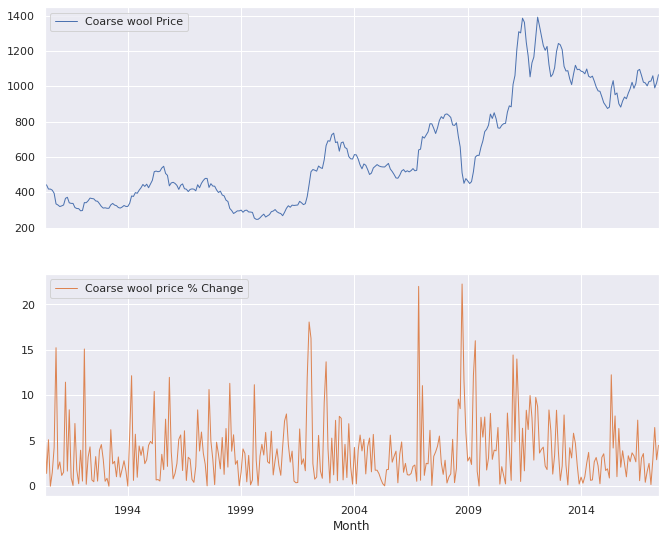

In [27]:
axes=df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)


### Copra 

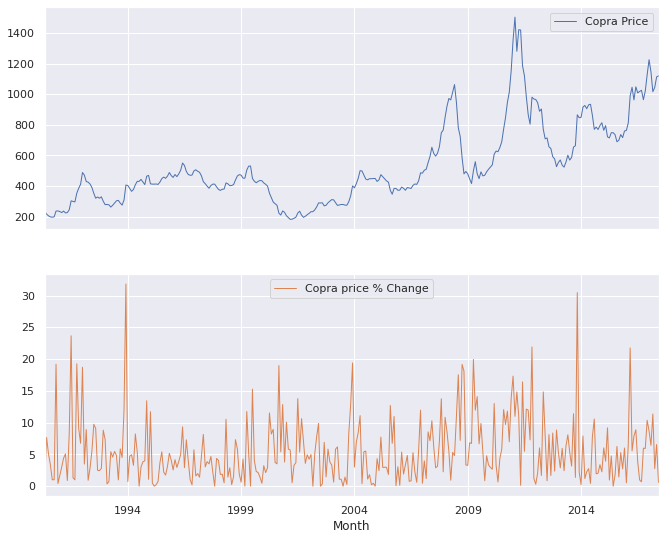

In [48]:
df[["Copra Price", "Copra price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)


### Cotton 


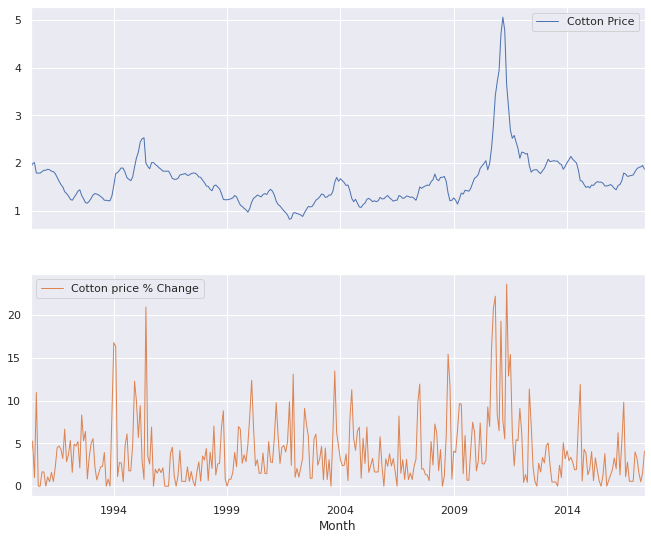

In [25]:
 axes=df[["Cotton Price", "Cotton price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

### Fine wool 

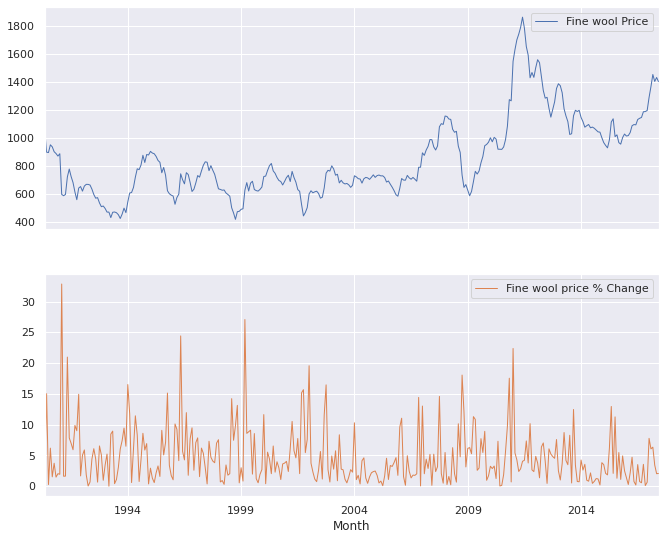

In [24]:
 axes=df[["Fine wool Price", "Fine wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

### Hard log 

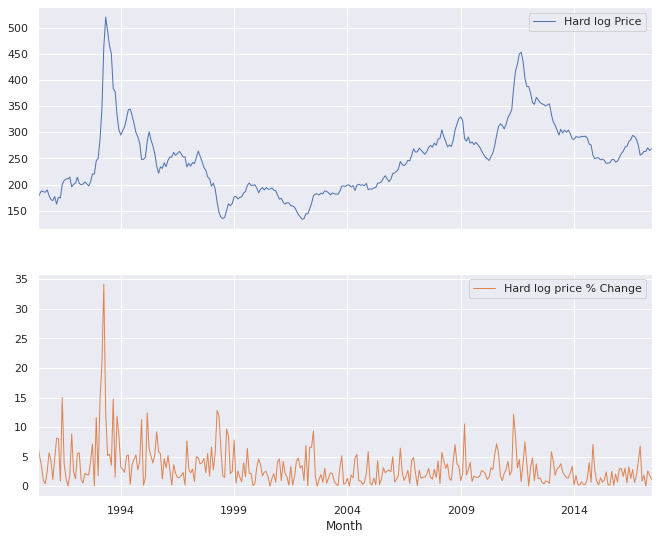

In [31]:
axes = df[["Hard log Price", "Hard log price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)



### Hard sawnwood

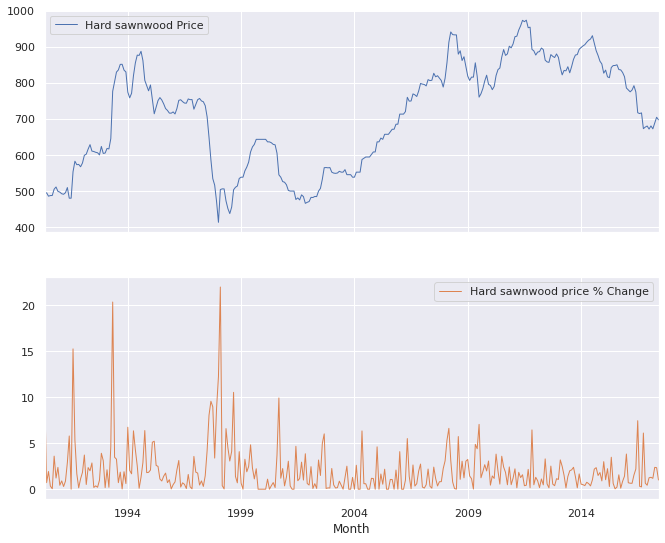

In [30]:
axes = df[["Hard sawnwood Price","Hard sawnwood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

### Hide 

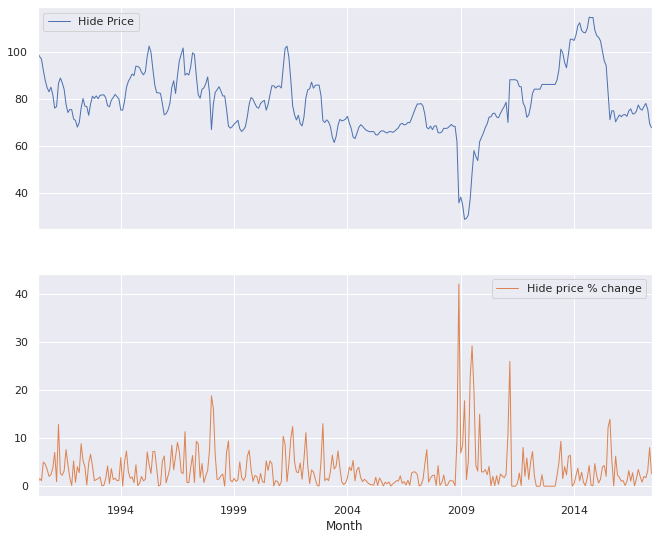

In [29]:
axes = df[["Hide Price","Hide price % change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

### Plywood 

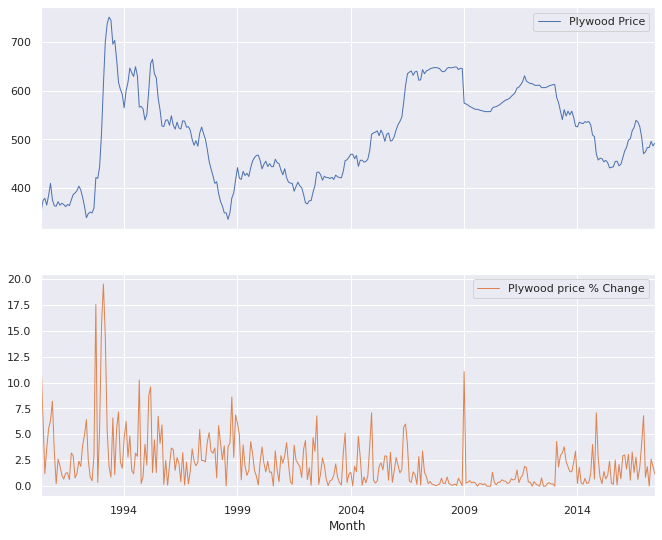

In [32]:
axes = df[["Plywood Price","Plywood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

### Rubber 

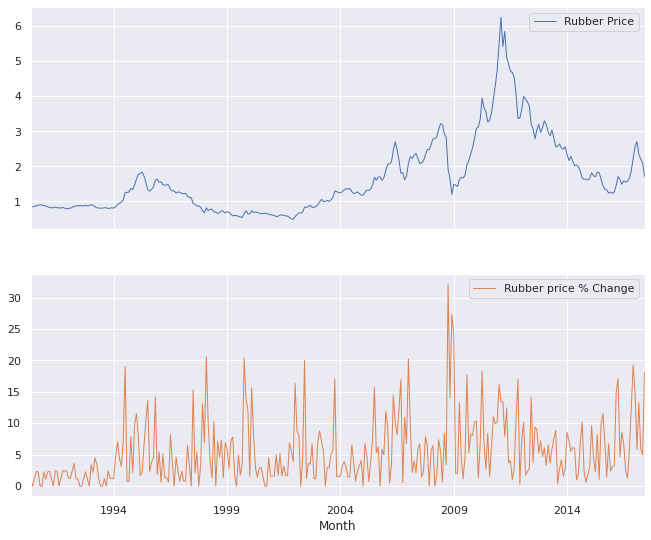

In [33]:
axes = df[["Rubber Price","Rubber price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

### Softlog 

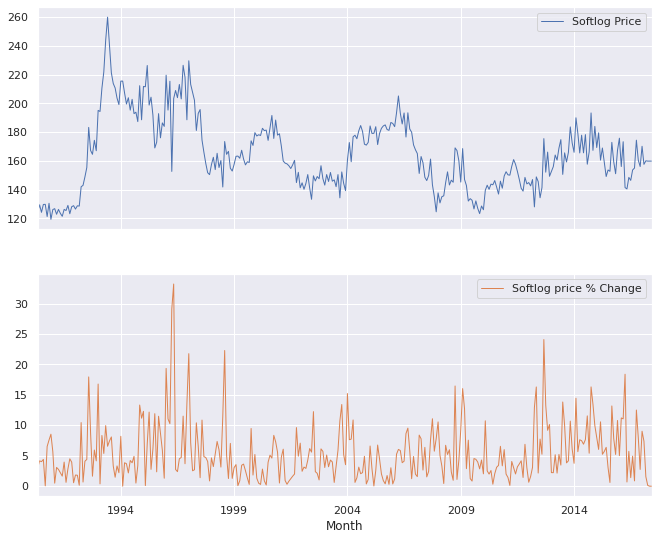

In [34]:
axes = df[["Softlog Price","Softlog price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

### Soft Sawnwood 

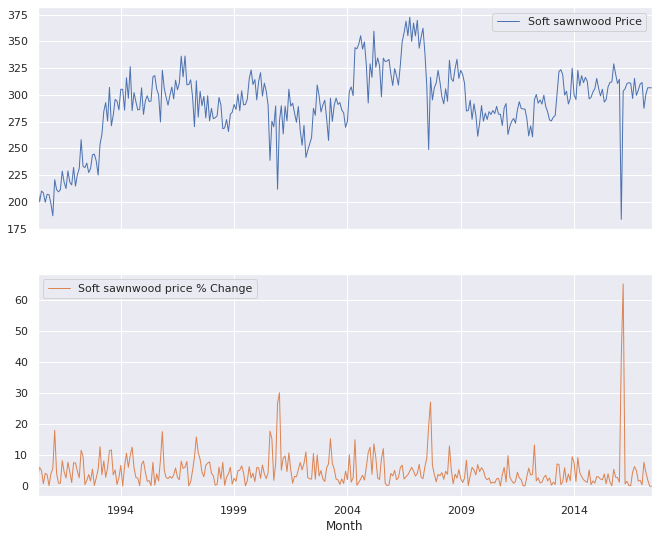

In [35]:
axes = df[["Soft sawnwood Price","Soft sawnwood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

### Wood pulp

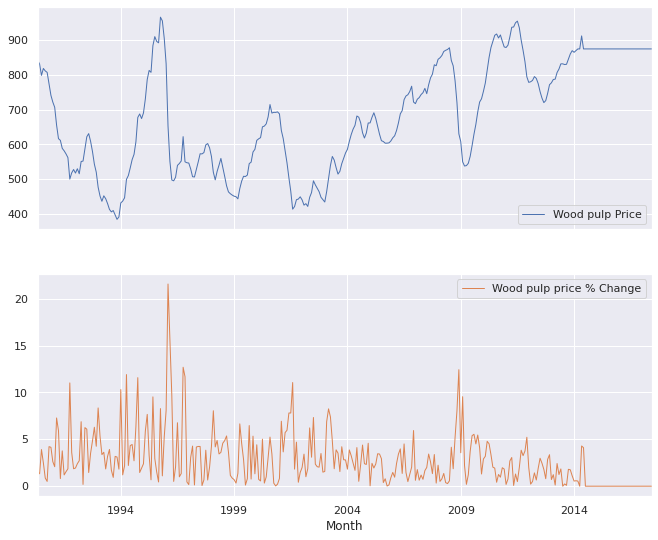

In [36]:
axes = df[["Wood pulp Price","Wood pulp price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

Let us save and upload our work to Jovian before continuing

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jayashreemallipudi3/agricultural-raw-material-prices-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jayashreemallipudi3/agricultural-raw-material-prices-project


'https://jovian.ai/jayashreemallipudi3/agricultural-raw-material-prices-project'

## Asking and Answering Questions


#### Q1:  Find out the normal price change for each raw material

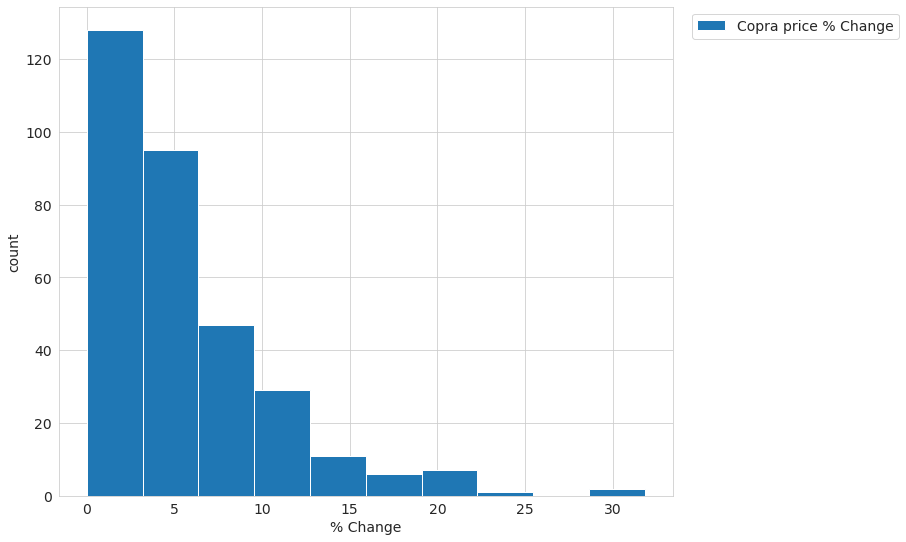

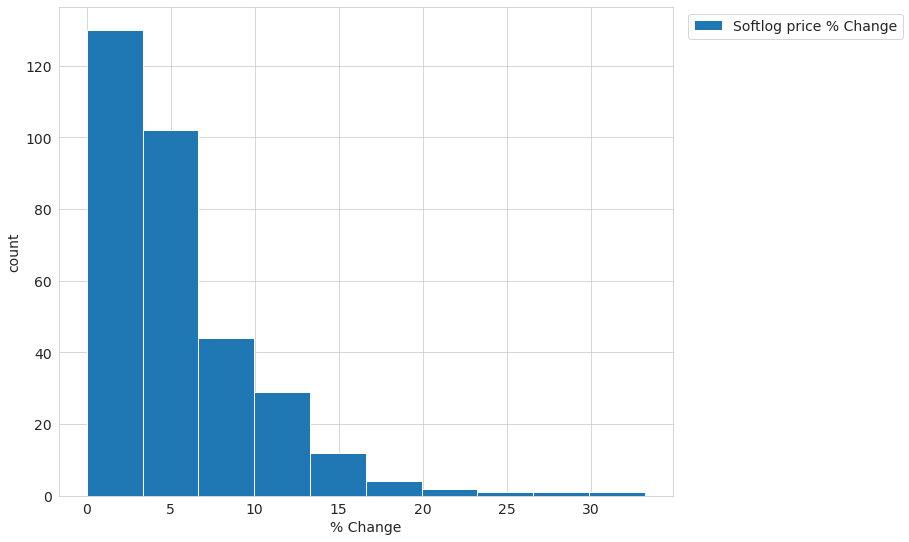

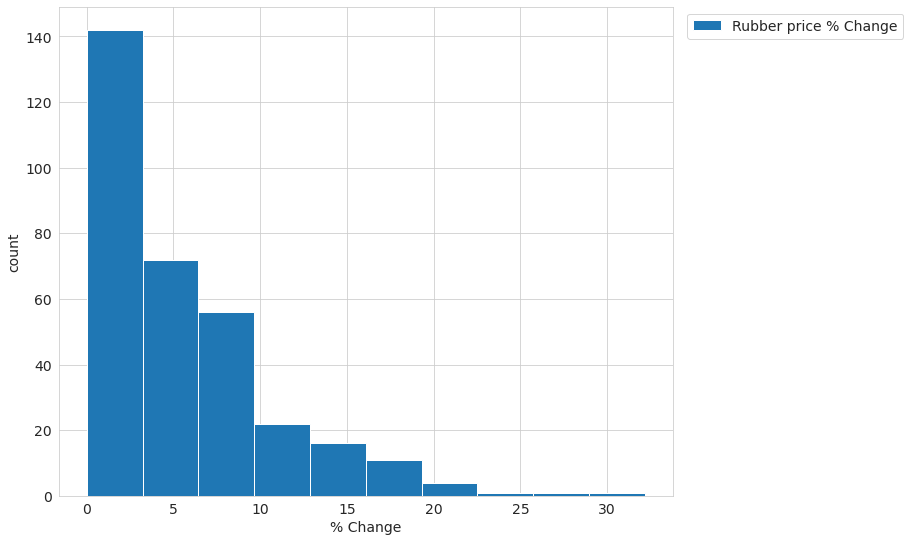

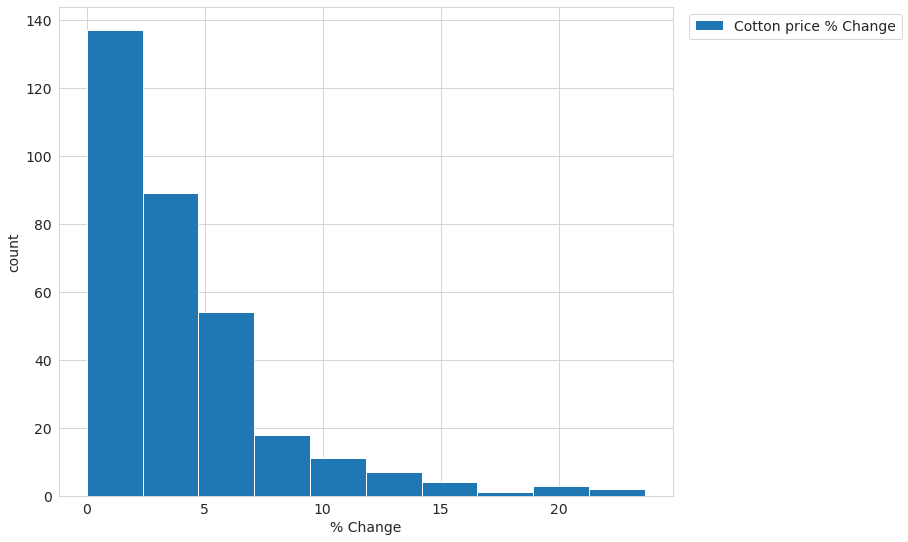

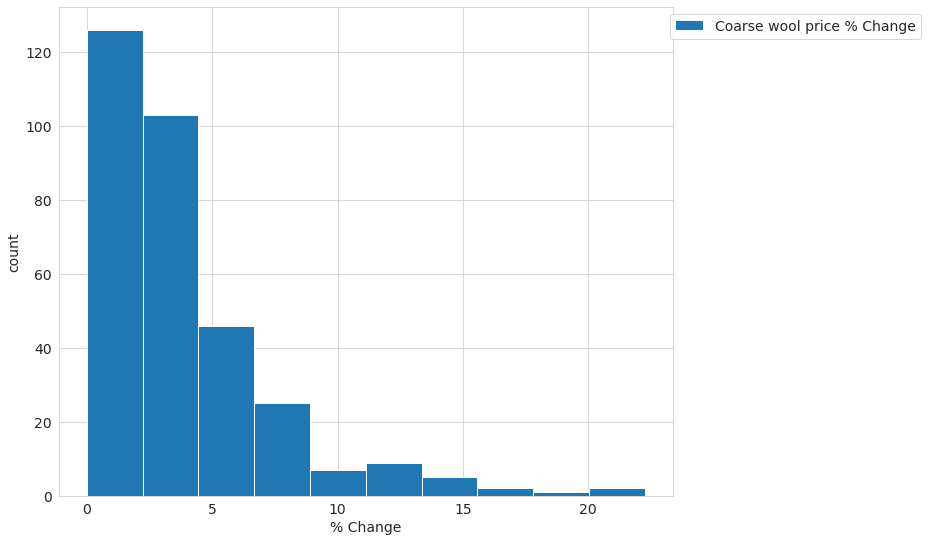

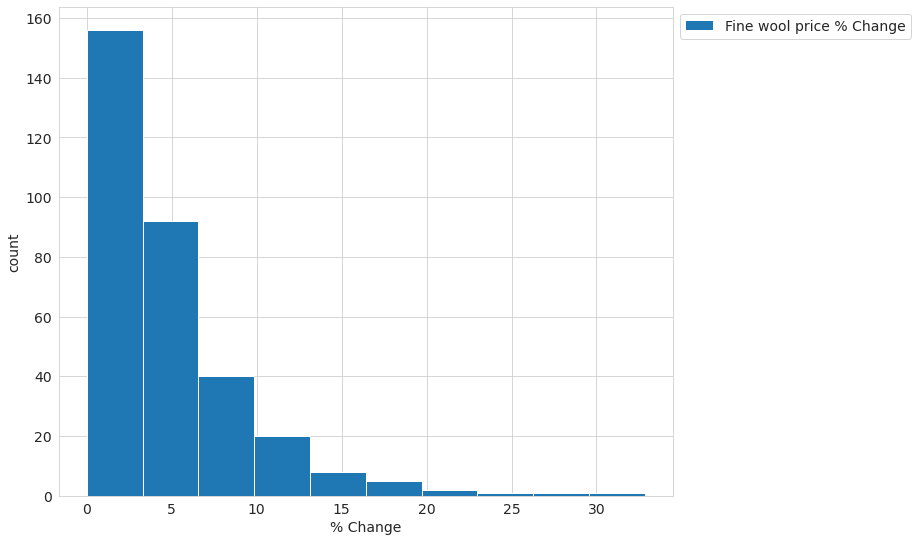

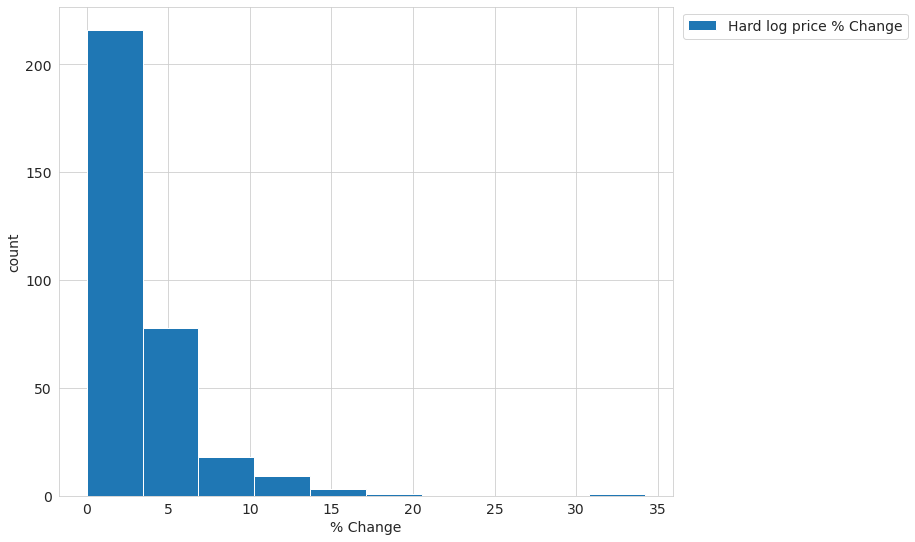

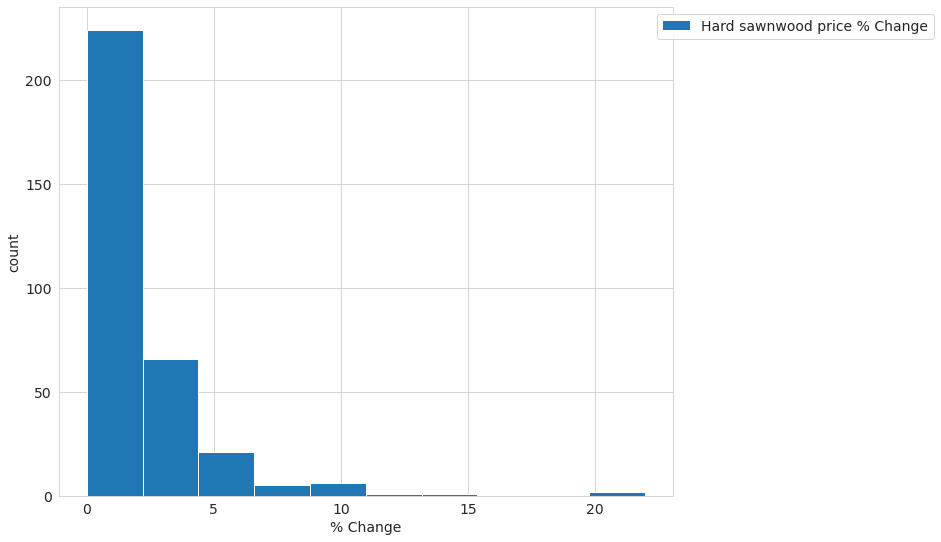

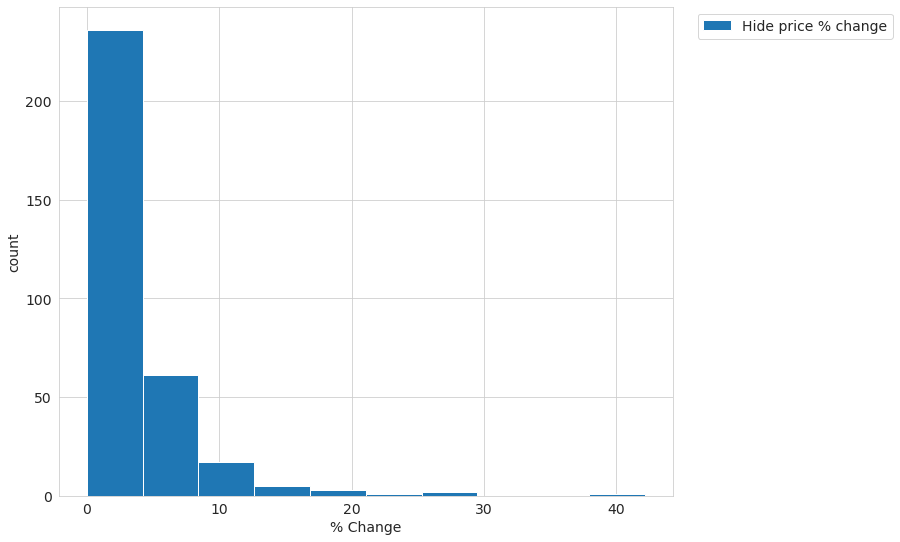

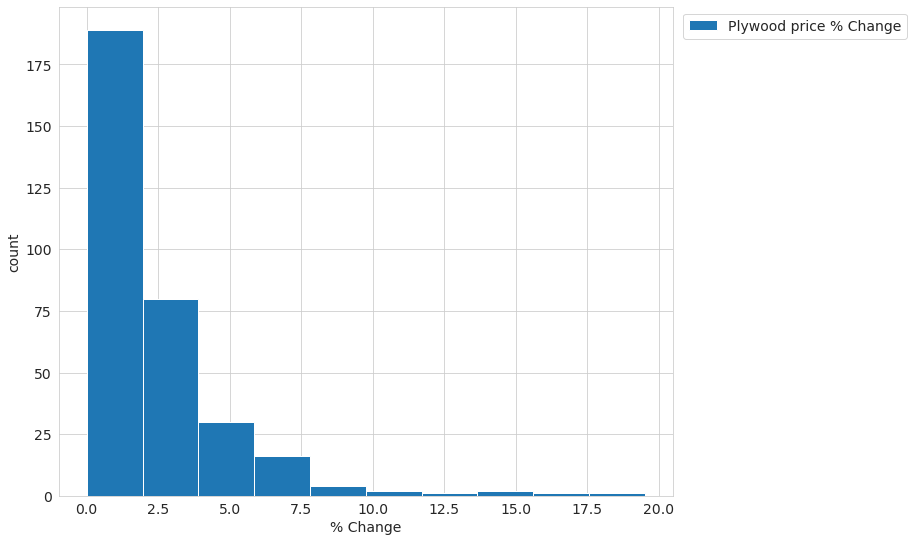

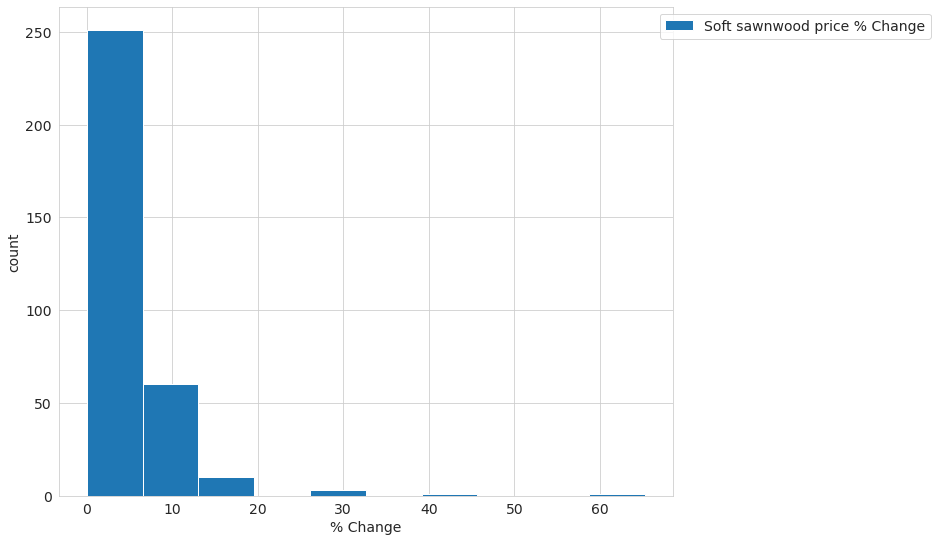

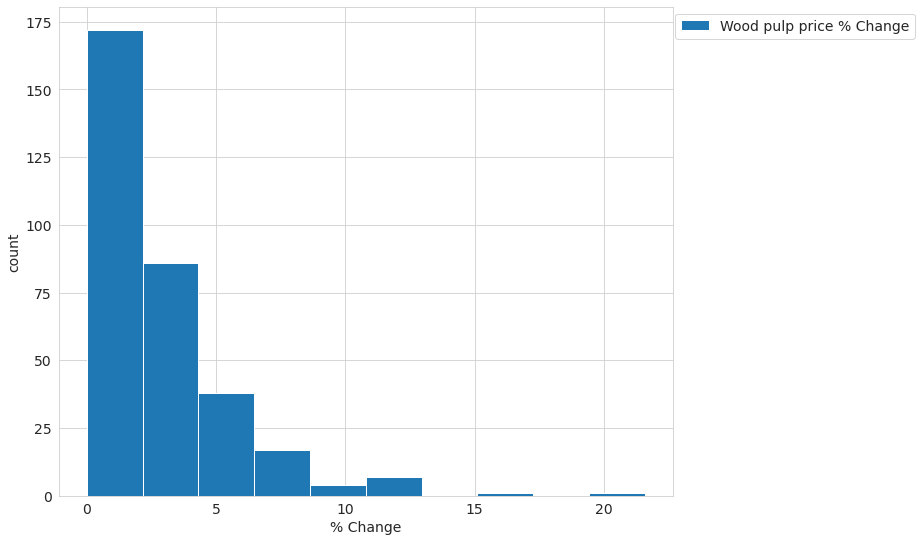

In [95]:
#df[["Wood pulp Price", "Wood pulp price % Change"]].hist(figsize=(11, 9), linewidth=1)

changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))


We can observe that most raw-materials have ideal frequent %change less than 5% 

#### Q2: Find the raw-material that has lowest price over years

Text(0.5, 0.98, 'Raw-Materials price comparision')

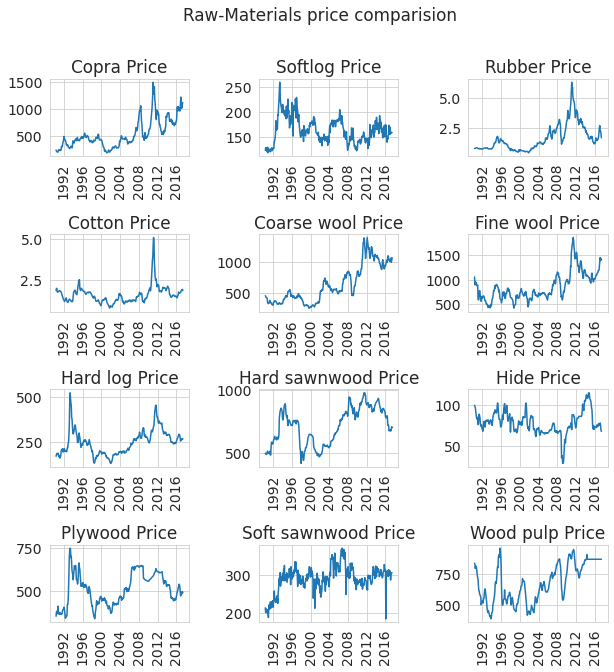

In [91]:
plt.figure(figsize=(10, 10))
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")


1. We can see cotton and rubber are of lowest prices
2. lets compare prices to better understand which is lowest

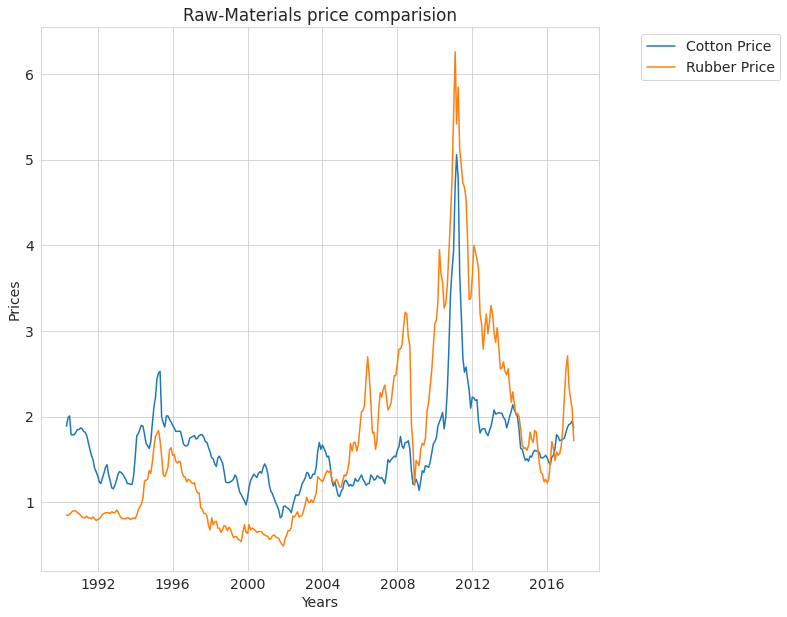

In [93]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

## cotton is lowest price rawmaterials in recent years 
#### Both cotton and rubber are low price materials

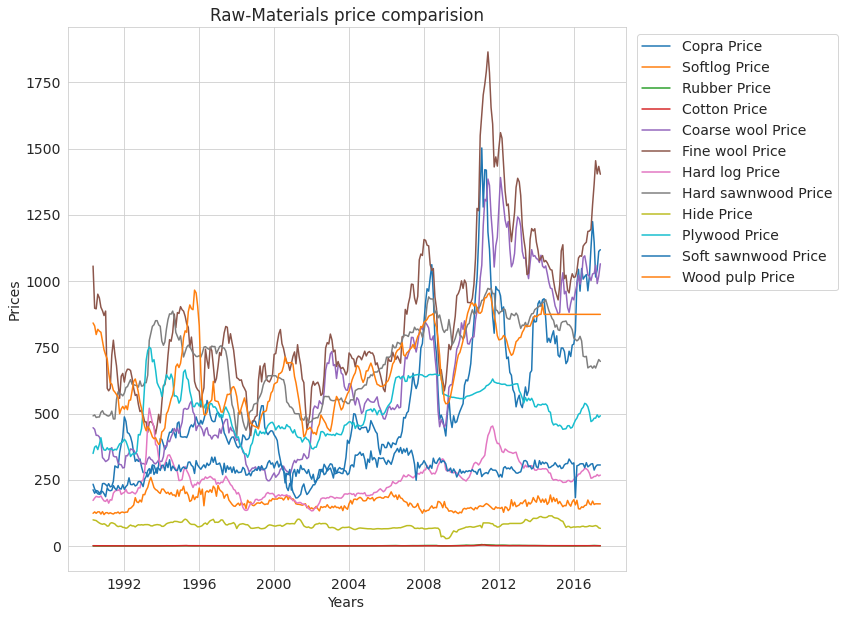

In [92]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))

From the graphs we could analyze raw materials into types according their price over years
#### low price materials 
 -cotton,hide,softlog,Hard log,Soft sawnwood Price,rubber 
#### High price materials
 -coarse wool,copra,fine wool,hard sawnwood,woodpulp,plywood

#### Q3: which raw material has the highest and lowest price % change

In [97]:
import random as random

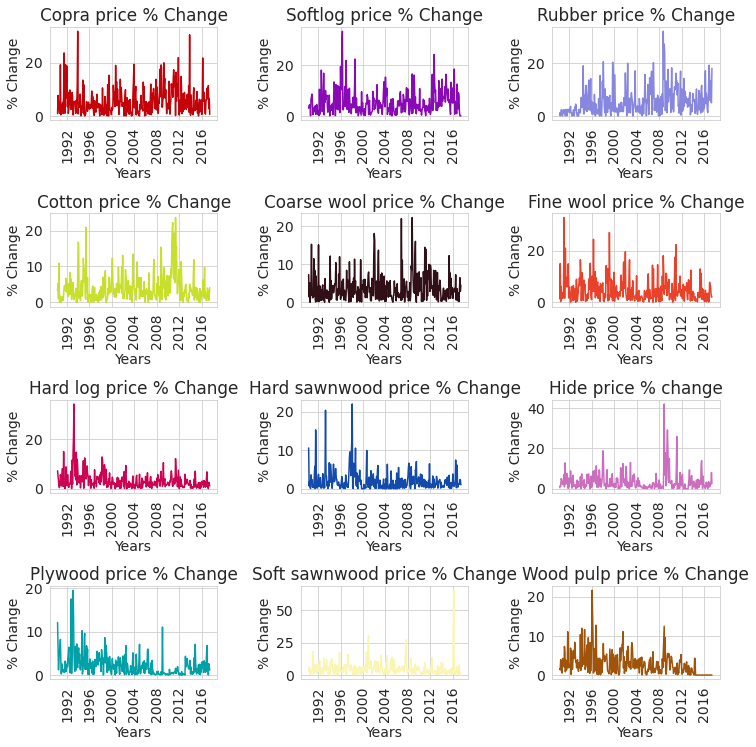

In [102]:
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
for i in range(len(changelist)):
   
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[changelist[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')
    #plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))


We can see the highest % change at more than 60 for soft sawnwood 
and lowest % change is for plywood at less at 20 

#### Q4: Find the raw materials with drastic price change

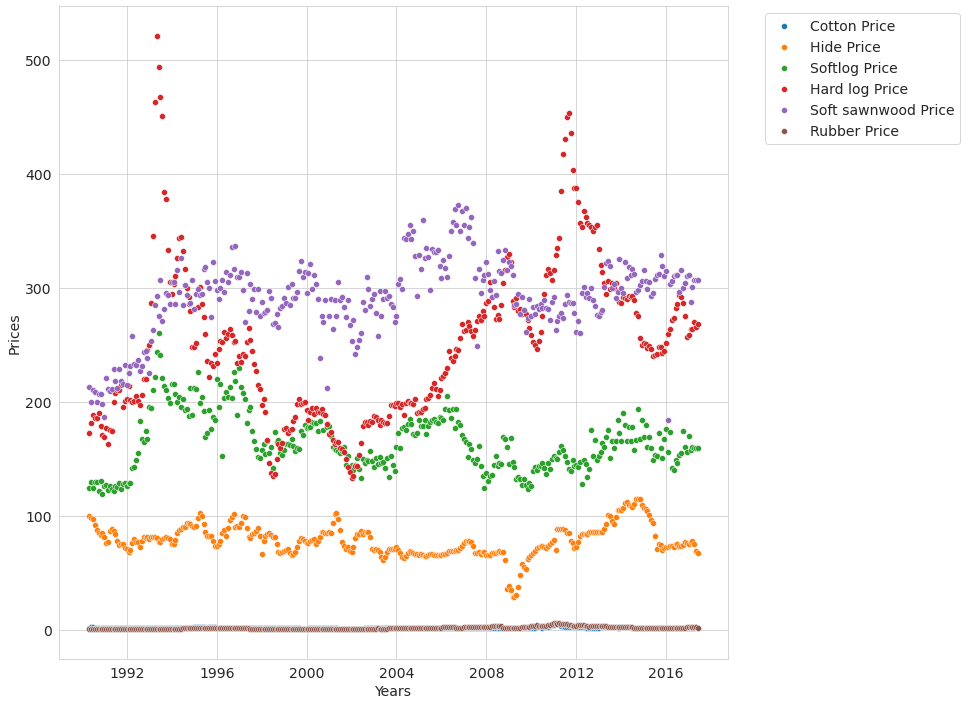

In [73]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
#plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]],x=df.index);
    plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))


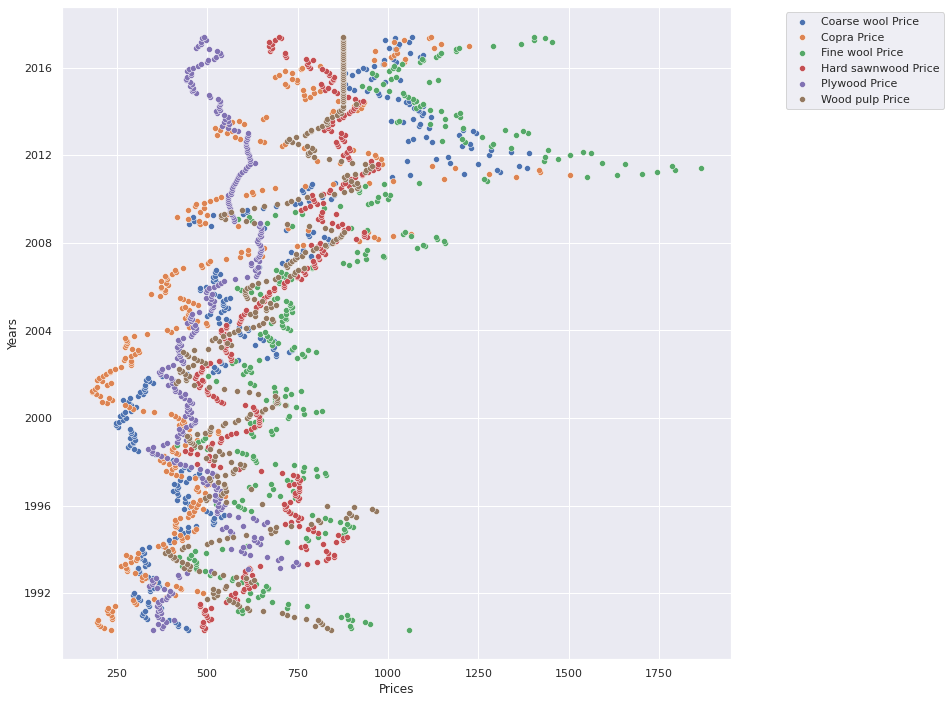

In [49]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
#lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Plywood Price']
highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))


Price change is drastic for hard log price among low price range materials and 
Among high price materials it is Fine wool prices 

#### Q5: Figure out the price range of low priced raw-materials

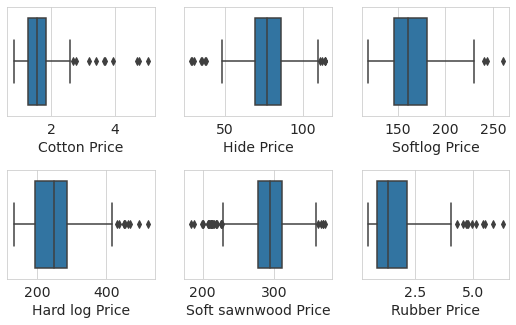

In [69]:
#plt.figure(figsize=(10, 10))
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(lowlist[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])

Box Plot gives us the distribution of data

It includes:
Inter quartile range is between Q3 and Q1
minimum, first quartile (Q1), median, third quartile (Q3), and maximum and outliers

Let us save and upload our work to Jovian before continuing.

In [103]:
import jovian

In [104]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jayashreemallipudi3/agricultural-raw-material-prices-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jayashreemallipudi3/agricultural-raw-material-prices-project


'https://jovian.ai/jayashreemallipudi3/agricultural-raw-material-prices-project'

## Inferences and Conclusion
1. We found out the high range and low range raw-materials according to their prices.
2. high and low %Change materials
3. We could identify the the range of prices change over the years.
4. Correlation between them using a heatmap 

In [39]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

1. Further we could find out relationship between raw-materials in details and with the help of business knowledge we could figure out the closest related raw materials 
2. We could also predict the prices of raw-materials by analysing the previous years
3. Predicting the range of price change and based on that we could plan our raw material usage in advance for the coming the year and figure out any alternative materials.

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'